In [4]:
# Import necessary modules
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the model with two hidden layers
model = Sequential()
model.add(Dense(400, activation='relu', input_shape=(784,)))
model.add(Dropout(0.4))
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Print the model summary
model.summary()


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8298 - loss: 0.5444 - val_accuracy: 0.9625 - val_loss: 0.1313
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9502 - loss: 0.1652 - val_accuracy: 0.9716 - val_loss: 0.0922
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9646 - loss: 0.1202 - val_accuracy: 0.9754 - val_loss: 0.0857
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9710 - loss: 0.0995 - val_accuracy: 0.9773 - val_loss: 0.0722
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9726 - loss: 0.0867 - val_accuracy: 0.9802 - val_loss: 0.0702
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9751 - loss: 0.0789 - val_accuracy: 0.9784 - val_loss: 0.0785
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9793 - loss: 0.0648 - val_accuracy: 0.9812 - val_loss: 0.0706
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9811 - loss: 0.0640 - val_accu

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 400)            │       314,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         3,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 874,622 (3.34 MB)

 Trainable params: 437,310 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 437,312 (1.67 MB)

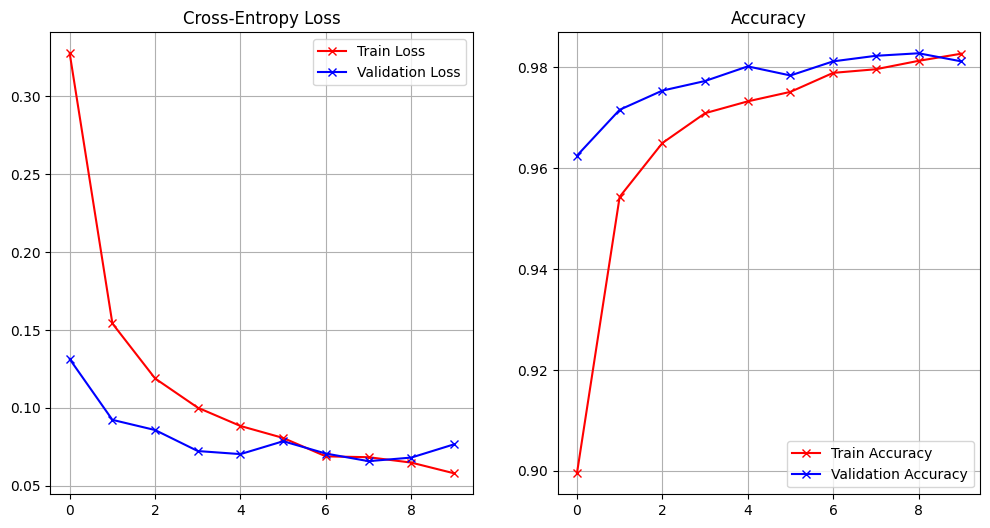

In [6]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history)